# read in combined CARIACO csv

In [180]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [181]:
pd_CARIACO = pd.read_csv("../DATA/Combined_CARIACO_data_v2.csv")

In [182]:
pd_CARIACO['time_month_dt'] = pd.to_datetime(pd_CARIACO['time_month'])

In [183]:
pd_CARIACO = pd_CARIACO.drop(labels='Unnamed: 0', axis=1)

In [184]:
pd_CARIACO = pd_CARIACO.set_index('time_month_dt')
pd_CARIACO.index.rename('time', inplace=True)

In [185]:
## get metadata from the original netcdf files!

In [186]:
#pd.DataFrame(data={'par_names':pd_CARIACO.columns.values}).to_csv('CombinedCARIACOannotations.csv')

# convert to xarray dataset

In [187]:
from datetime import date

today = date.today()

In [188]:
str(today)

'2021-12-13'

In [189]:
metadata = {'creator': 'Benjamin Post', 'creation date': str(today)}
CARIACO = xr.Dataset.from_dataframe(pd_CARIACO)
CARIACO.attrs = metadata

# add Metadata programmatically
- add clear text variable names
- add units
- add data source
- add data group (biological, physical, chemical)

In [228]:
wind_meta = pd.read_csv("META/ERA5_META.csv")

In [229]:
wind_meta.columns

Index(['Unnamed: 0', 'GRIB_paramId', 'GRIB_shortName', 'GRIB_units',
       'GRIB_name', 'GRIB_cfVarName', 'GRIB_dataType', 'GRIB_missingValue',
       'GRIB_numberOfPoints', 'GRIB_totalNumber', 'GRIB_typeOfLevel',
       'GRIB_NV', 'GRIB_stepUnits', 'GRIB_stepType', 'GRIB_gridType',
       'GRIB_gridDefinitionDescription', 'GRIB_Nx',
       'GRIB_iDirectionIncrementInDegrees', 'GRIB_iScansNegatively',
       'GRIB_longitudeOfFirstGridPointInDegrees',
       'GRIB_longitudeOfLastGridPointInDegrees', 'GRIB_Ny',
       'GRIB_jDirectionIncrementInDegrees', 'GRIB_jPointsAreConsecutive',
       'GRIB_jScansPositively', 'GRIB_latitudeOfFirstGridPointInDegrees',
       'GRIB_latitudeOfLastGridPointInDegrees', 'long_name', 'units',
       'custom_name', 'GRIB_cfName', 'standard_name'],
      dtype='object')

In [230]:
for var in CARIACO.data_vars:
    print(var)
    row = wind_meta.loc[wind_meta['GRIB_cfVarName'] == var]
    if len(row) > 0:        
        print(row['GRIB_name'].values)
        print(row['custom_name'].values)
        print(row['GRIB_units'].values)



cdww
['Coefficient of drag with waves']
['coefficient_of_drag_with_waves']
['dimensionless']
iews
['Instantaneous eastward turbulent surface stress']
['instantaneous_eastward_turbulent_surface_stress']
['N m**-2']
inss
['Instantaneous northward turbulent surface stress']
['instantaneous_northward_turbulent_surface_stress']
['N m**-2']
mcc
['Medium cloud cover']
['medium_cloud_cover']
['(0 - 1)']
mwp
['Mean wave period']
['mean_wave_period']
['s']
si10
['10 metre wind speed']
['10m_wind_speed']
['m s**-1']
sp
['Surface pressure']
['surface_pressure']
['Pa']
sst
['Sea surface temperature']
['sea_surface_temperature']
['K']
t2m
['2 metre temperature']
['2m_temperature']
['K']
tauoc
['Normalized stress into ocean']
['normalized_stress_into_ocean']
['dimensionless']
u10
['10 metre U wind component']
['10m_u_component_of_wind']
['m s**-1']
ust
['U-component stokes drift']
['u_component_stokes_drift']
['m s**-1']
v10
['10 metre V wind component']
['10m_v_component_of_wind']
['m s**-1']
v10n
[

In [204]:
### add units
# data.attrs['long_name']
# data.attrs['units']

CARIACO.Chlorophyll.attrs['long_name'] = 'Chlorophyll conc. top 100m [mg m^-3]'
CARIACO.Chlorophyll.attrs['unit'] = '[mg m^-3]'

In [205]:
CARIACO.Chlorophyll.unit

'[mg m^-3]'

In [217]:
#chl_pd.values
from matplotlib.pyplot import figure
def plot_yearmonth_cmap(data):
    
    figure(figsize=(7, 8), dpi=80)
    data_pd = data.to_dataframe()
    
    dat_pivot = (data_pd.assign(year=data_pd.index.year, month=data_pd.index.month)#.unstack()
      .pivot_table(index='year', columns='month', values=data.name)
    )
    ax = plt.gca()
    c = plt.pcolormesh(dat_pivot)

    cbar = plt.colorbar(c)
    cbar.set_label(data.name + ' ' + data.unit)
    plt.clim(0)
    
    ax.set_yticks(np.arange(0,len(dat_pivot.index.values)))
    ax.set_yticklabels(dat_pivot.index.values)
    ax.set_ylabel('Years')
    
    ax.set_xticks(np.arange(0,12)+1-0.5)
    ax.set_xticklabels(np.arange(1,13))
    ax.set_xlabel('Months')

    plt.show()

<Figure size 560x640 with 0 Axes>

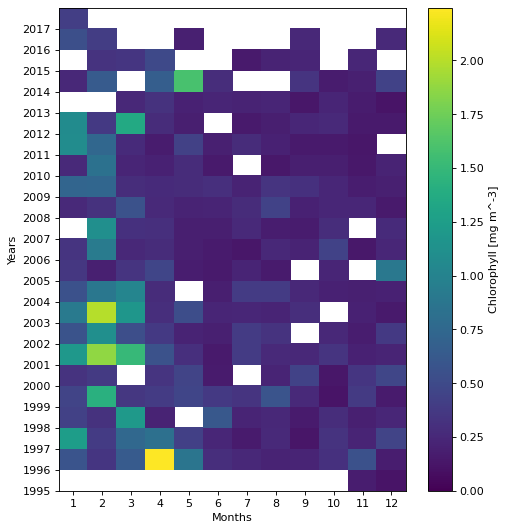

In [218]:
from matplotlib.pyplot import figure
figure(figsize=(7, 8), dpi=80)

plot_yearmonth_cmap(CARIACO.Chlorophyll)

In [219]:
#CARIACO.u10

AttributeError: 'DataArray' object has no attribute 'unit'

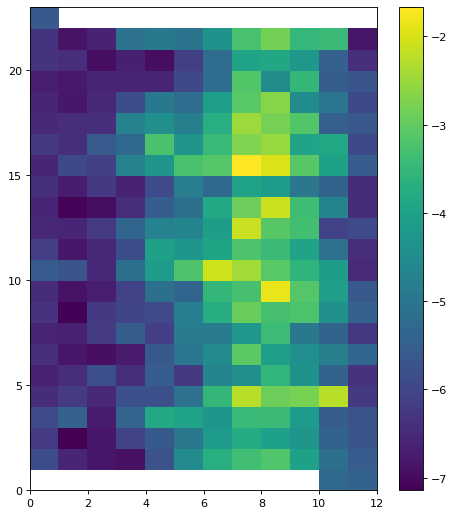

In [220]:
plot_yearmonth_cmap(CARIACO.u10)

In [179]:
#timetest = CARIACO.expand_dims({'year':CARIACO['time.year'],'month':CARIACO['time.month']})

In [180]:
time2darray = np.vstack((CARIACO['time.year'].values,CARIACO['time.month'].values))

In [182]:
timetest = CARIACO.assign_coords(new_dim=(('year', 'month'), time2darray))

ValueError: x must be one of None, 'time'

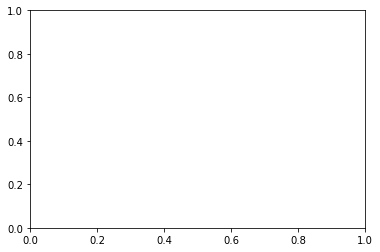

In [184]:
timetest.Chlorophyll.plot(x='year')

In [170]:
timetest.plot.pcolormesh(x='month',y='time',z='Chlorophyll')

AttributeError: '_Dataset_PlotMethods' object has no attribute 'pcolormesh'

In [169]:
timetest.Chlorophyll.plot.pcolormesh()

ValueError: DataArray must be 2d

ValueError: x must be one of None, 'time'

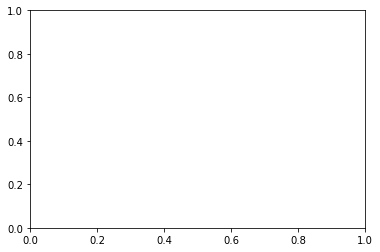

In [148]:
CARIACO.Chlorophyll.plot(x='month')

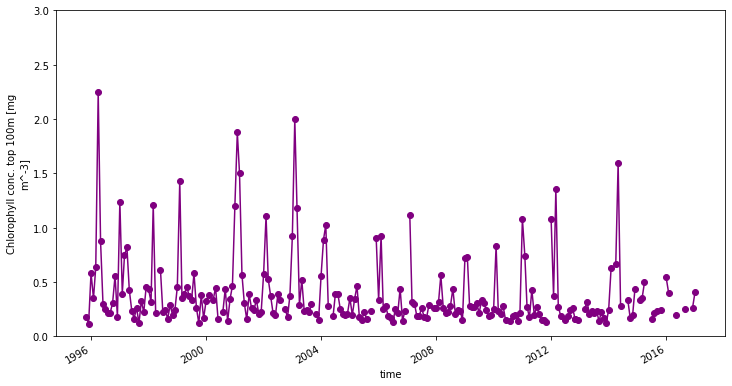

In [139]:
CARIACO.Chlorophyll.plot.line(color="purple", marker="o",
                             aspect=2, size=6, ylim=[0,3])

# export to ncdf for plotting etc.